# **7. 인공신경망 기초**

---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 7-4: XOR 연산이 가능한 다층 퍼셉트론 만들기**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_dim = 2
h_dim = 3
y_dim = 2

U = np.random.rand(x_dim + 1, h_dim)   # 연결강도
W = np.random.rand(h_dim + 1, y_dim)   # 연결강도
learning_rate = 1.5       # 학습률

In [3]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)


In [4]:
# 입력을 위한 변수
input = np.zeros(2)

# 순전파시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들
h_error, h_delta = np.zeros(3), np.zeros(3)


# 순전파시 계산될 값들
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들
y_error, y_delta = np.zeros(2), np.zeros(2)

In [5]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = np.array(x)
    input_1 = np.append(x, 1)              # 편향 처리를 위해
    h_sum = U.T.dot(input_1)               # 편향을 포함한 전파
    h_out = sigmoid(h_sum)                 #
    h_deriv = derivative_sigmoid(h_sum)    #

In [6]:
def forward_hy():
    global y_sum, y_out, y_deriv
    h_out_1 = np.append(h_out, 1)           # 편향 처리를 위해
    y_sum = W.T.dot(h_out_1)                # 편향을 포함한 전파
    y_out = sigmoid(y_sum)                  #
    y_deriv = derivative_sigmoid(y_sum)     #

In [7]:
def compute_error(target):
    return y_out - target                   #

In [8]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    #  error
    y_delta = y_deriv * y_error                        #
    ## 연결강도 W 수정
    h_out_1 = np.append(h_out, 1)                      # 편향 연결 노드 추가
    dW = - learning_rate * np.outer(h_out_1, y_delta)  #
    W = W + dW                                         #

In [9]:
def backward_h():
   global h_error, h_delta, U

   h_error = W.dot(y_delta)[:h_dim]                     # 은닉층 연결 값만
   h_delta = h_deriv * h_error                          #
   ## 연결강도 U 수정
   input_1 = np.append(input, 1)                        # 편향 연결 노드 추가
   dU = - learning_rate * np.outer(input_1, h_delta)    #
   U = U + dU                                           #

In [10]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

In [11]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    loss.append(e_accum)

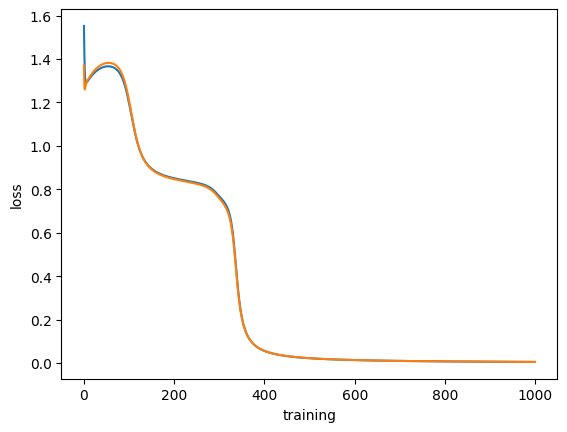

In [12]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [13]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [14]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.04115792, 0.95835067]),
 array([0.96612434, 0.03368066]),
 array([0.96631525, 0.03358295]),
 array([0.03451218, 0.96576318])]

### LAB 7-6다층 퍼셉트론으로 비선형 회귀 구현하기

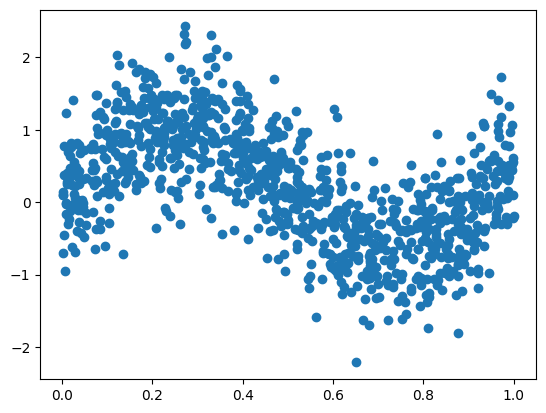

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [16]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx + 1 , nh1)
V = np.random.randn(nh1 + 1, nh2)
W = np.random.randn(nh2 + 1, ny)
learning_rate = 0.1

In [17]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [18]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산

In [19]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv
    input = np.array(x)
    input_1 = np.append(x, 1)                    # 편향 처리
    h1_out = sigmoid ( U.T.dot(input_1) )        # 은닉계층 1로 전파
    h1_deriv = h1_out * (1 - h1_out)             # 은닉계층 1의 미분

    h1_out_1 = np.append(h1_out, 1)              # 편향 처리
    h2_out = sigmoid ( V.T.dot(h1_out_1) )       # 은닉계층 2로 전파
    h2_deriv = h2_out * (1 - h2_out)             # 은닉계층 2의 미분

    h2_out_1 = np.append(h2_out, 1)              # 편향 처리
    y_out = sigmoid( W.T.dot(h2_out_1) )         # 출력계층으로 전파
    y_deriv = y_out * (1 - y_out)                # 출력계층의 미분

In [20]:
def compute_error(target):
    return y_out - target

In [21]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U

    y_delta = y_deriv * error                           # 출력 계층의 델타
    h2_out_1 = np.append(h2_out, 1)                     # 편향 처리
    dW = - learning_rate * np.outer(h2_out_1, y_delta)  # W의 수정
    W = W + dW


    h2_delta = h2_deriv * W.dot(y_delta)[:nh2]          # 은닉 계층 2의 델타
    h1_out_1 = np.append(h1_out, 1)                     # 편향 처리
    dV = - learning_rate * np.outer(h1_out_1, h2_delta) # V의 수정
    V = V + dV


    h1_delta = h1_deriv * V.dot(h2_delta)[:nh1]         # 은닉 계층 1의 델타
    input_1 = np.append(input, 1)                       # 편향 처리
    dU = - learning_rate * np.outer(input_1, h1_delta)  # U의 수정
    U = U + dU


In [22]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

In [23]:
loss = []
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
for i in range(300):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)

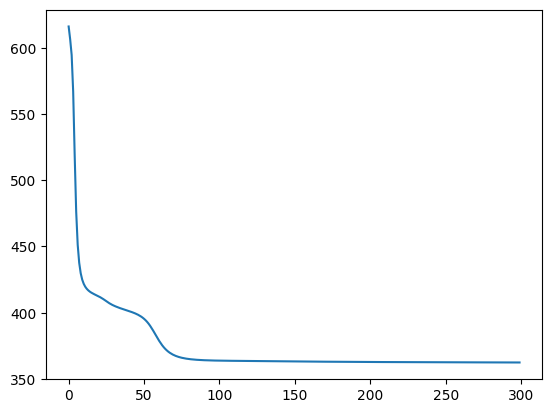

In [24]:
err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

In [25]:
def predict(X):
    y_hat = []
    for x in X:
        forward(x)
        y_hat.append(y_out)
    return y_hat

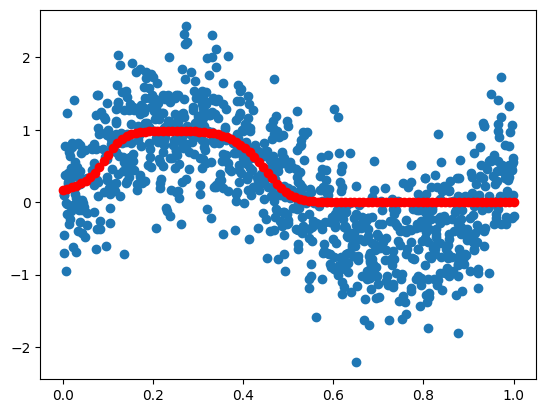

In [26]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.9 인공 신경망을 설계하고 훈련할 수 있는 도구: 텐서플로우

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf    # 텐서플로우는 주로 tf라는 별명을 사용한다
from tensorflow import keras

In [28]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

In [29]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [30]:
data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy().reshape(-1,1)
y_label = df['y'].to_numpy()

In [31]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6656
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6175
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6793
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6187
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6122
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5869
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5065
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4340
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4158
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4274
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3966
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4436
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3870
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3898
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4048
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


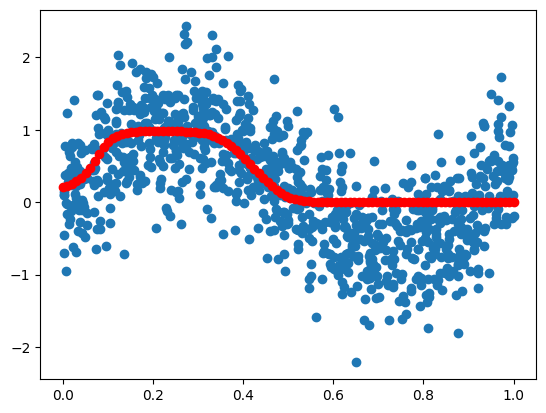

In [32]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')